1743.1597618895173


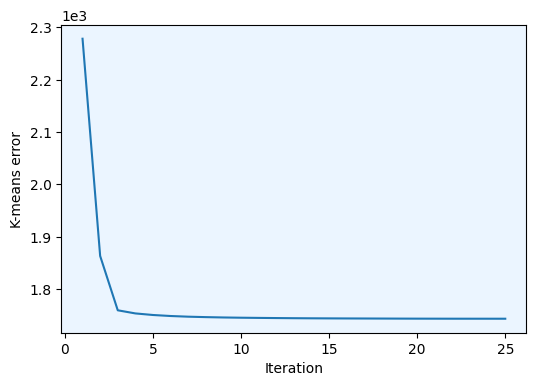

In [6]:
import numpy as np
from matplotlib import pyplot as plt

data = np.genfromtxt('A2Q1.csv', delimiter=',')
num_clusters = 4
num_points, dimensions = data.shape
num_initialisations = 100
num_iterations = 25
distant_point = np.array([1e9 for _ in range(dimensions)])

def calculate_distance(point1, point2):
    sep = point1 - point2
    return np.sqrt(np.dot(sep, sep))

def calculate_error(data, means, z):
    error = 0
    for i, point in enumerate(data):
        error += calculate_distance(point, means[z[i]])**2

    return error

def update_means(data, z):
    means = np.zeros((num_clusters, dimensions), dtype='float64')
    num_cluster_points = np.zeros(num_clusters)

    for i, point in enumerate(data):
        means[z[i]] += point
        num_cluster_points[z[i]] += 1

    for i, mean in enumerate(means):
        if num_cluster_points[i] != 0:
            mean /= num_cluster_points[i]
        else:
            mean = distant_point 

    return means

def update_z(means, data, z):
    for i, point in enumerate(data):
        for j, mean in enumerate(means):
            if calculate_distance(point, means[z[i]]) > calculate_distance(point, mean):
                z[i] = j

    return z

errors = np.zeros(num_iterations)
for _ in range(num_initialisations):
    z = np.random.randint(0, num_clusters, num_points)
    means = update_means(data, z)

    for __ in range(num_iterations):
        errors[__] += calculate_error(data, means, z)
        z = update_z(means, data, z)
        means = update_means(data, z)

errors /= num_initialisations

print(errors[-1])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.linspace(1, num_iterations, num_iterations), errors)
ax.set_xlabel("Iteration")
ax.set_ylabel("K-means error")
ax.set_facecolor('#ebf5ff')
ax.ticklabel_format(scilimits=(-3, 2))
plt.savefig('images/Q1/k-means')
plt.show()